In [87]:
# STEP 1: Initial setup and imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, FloatSlider, IntSlider, Layout, Button, HBox, VBox, Output
import ipywidgets as widgets

# Set the working directory
os.chdir('/Users/anthonymccrovitz/Desktop/Sphery/Sphere Heart Rate Analysis')

# Add scripts directory to path
sys.path.append('scripts')

# Import TCX parser
from parse_tcx import parse_tcx_to_df

# Load the data
print("Loading User 68 TCX data...")
try:
    df, session_total_sec, sessions_avg_hr, session_max_hr, calories_burned = parse_tcx_to_df('data/68-d.tcx')
    session_duration_min = session_total_sec / 60
    print(f"Data loaded successfully: {len(df)} data points over {session_duration_min:.2f} minutes")
    print(f"Average HR: {sessions_avg_hr:.1f} bpm, Maximum HR: {session_max_hr} bpm, Calories: {calories_burned}")
except Exception as e:
    print(f"Error loading data: {e}")
    
# Load the background image
try:
    img = mpimg.imread('charts_cropped/user_68.png')
    print("Background image loaded successfully")
except Exception as e:
    print(f"Error loading background image: {e}")

Loading User 68 TCX data...
Data loaded successfully: 137 data points over 44.20 minutes
Average HR: 162.5 bpm, Maximum HR: 192 bpm
Background image loaded successfully


In [88]:
# Create output directories for plots
import os
plots_dir = f'output/plots/user_68'
os.makedirs(plots_dir, exist_ok=True)
print(f"Created plots directory: {plots_dir}")


Created plots directory: output/plots/user_68


In [ ]:
# Initialize global alignment parameters
# These will be updated by the interactive alignment tool
current_x_offset = -0.8  # Default starting values
current_x_scale = 1.0
current_y_min = 90
current_y_max = 190
current_alpha = 0.6


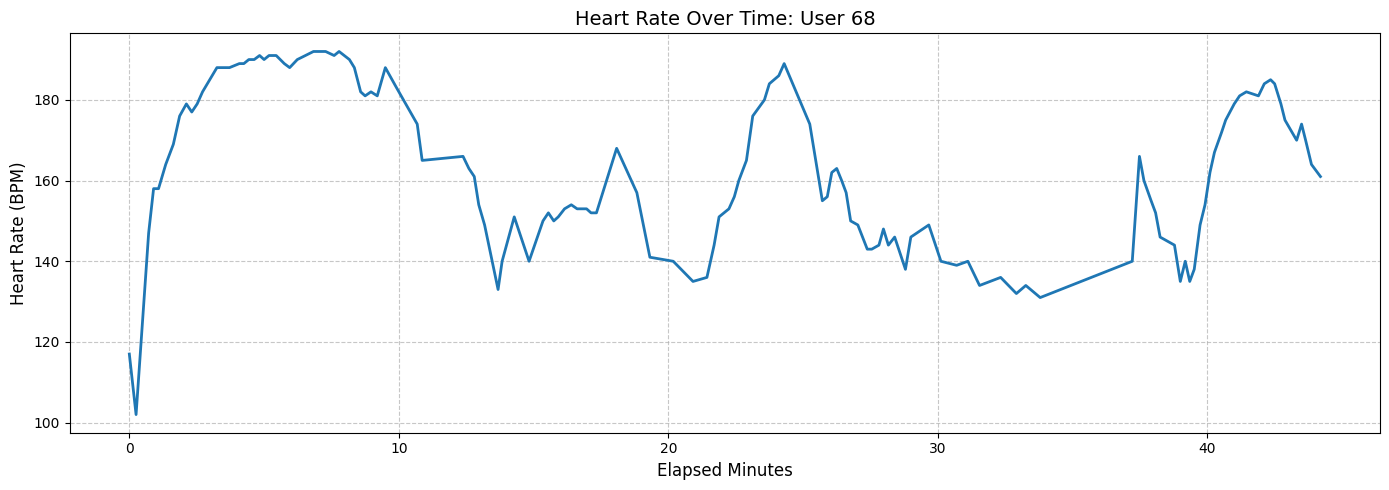

Maximum Heart Rate Details:
                   timestamp  heart_rate                start_time  \
28 2025-04-06 10:40:42+00:00         192 2025-04-06 10:33:52+00:00   
29 2025-04-06 10:40:53+00:00         192 2025-04-06 10:33:52+00:00   
30 2025-04-06 10:41:09+00:00         192 2025-04-06 10:33:52+00:00   
32 2025-04-06 10:41:39+00:00         192 2025-04-06 10:33:52+00:00   

    elapsed_min  
28     6.833333  
29     7.016667  
30     7.283333  
32     7.783333  


In [89]:
# STEP 2: Visualize the heart rate data
plt.figure(figsize=(14,5))
plt.plot(df['elapsed_min'], df['heart_rate'], linewidth=2)
plt.xlabel('Elapsed Minutes', fontsize=12)
plt.ylabel('Heart Rate (BPM)', fontsize=12)
plt.title('Heart Rate Over Time: User 68', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Save the plot
plt.savefig(f'{plots_dir}/heart_rate_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Show max heart rate point
max_hr_row = df[df['heart_rate'] == df['heart_rate'].max()]
print("Maximum Heart Rate Details:")
print(max_hr_row)

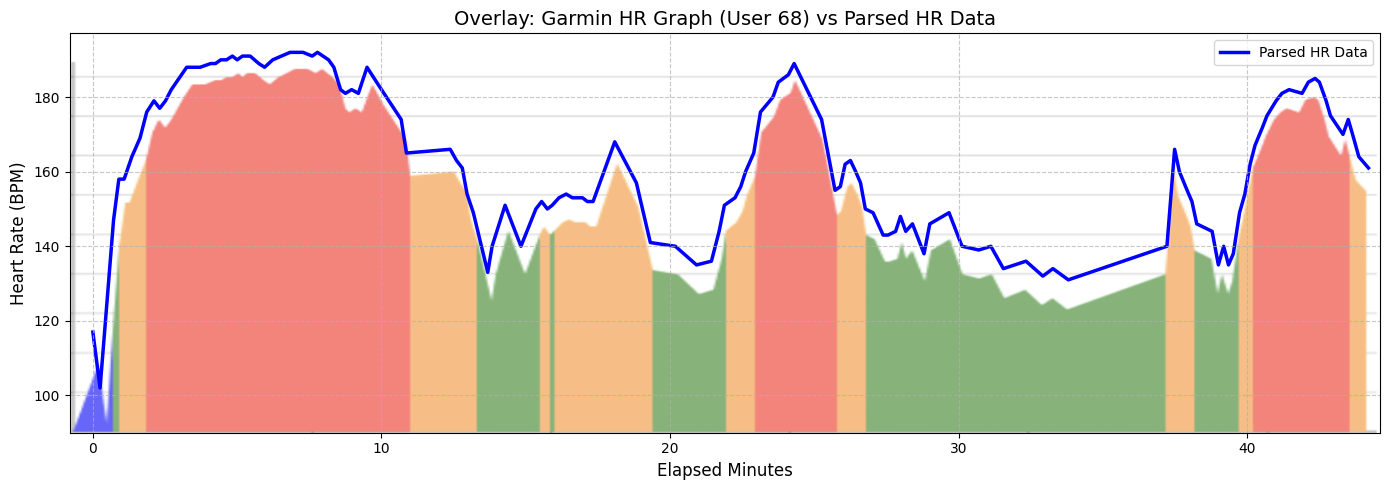

In [90]:
# STEP 3: Align heart rate data with Garmin graph
fig, ax = plt.subplots(figsize=(14,5))

# Initial alignment parameters
x_offset = -0.8  # Adjust left/right alignment
x_scale = 1.0    # Adjust width scaling
y_min = 90       # Set minimum heart rate
y_max = 190      # Set maximum heart rate
alpha = 0.6      # Background image opacity

# Calculate extent
x_min = x_offset
x_max = x_offset + (session_duration_min * x_scale) + 1.2

# Create overlay
ax.imshow(img, aspect='auto', extent=[x_min, x_max, y_min, y_max], 
          alpha=alpha, zorder=0, interpolation='bilinear')
ax.plot(df['elapsed_min'], df['heart_rate'], color='blue', 
        linewidth=2.5, label='Parsed HR Data', zorder=1)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_xlabel('Elapsed Minutes', fontsize=12)
ax.set_ylabel('Heart Rate (BPM)', fontsize=12)
ax.set_title('Overlay: Garmin HR Graph (User 68) vs Parsed HR Data', fontsize=14)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [91]:
# STEP 4: Interactive alignment tool
output = Output()

def update_alignment(x_offset=-0.8, x_scale=1.0, y_min=90, y_max=190, alpha=0.6):
    global current_x_offset, current_x_scale, current_y_min, current_y_max, current_alpha
    current_x_offset = x_offset
    current_x_scale = x_scale
    current_y_min = y_min
    current_y_max = y_max
    current_alpha = alpha
    with output:
        output.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(14,5))
        
        # Calculate extent based on sliders
        x_min = x_offset
        x_max = x_offset + (session_duration_min * x_scale) + 1.2
        
        # Display with current parameters
        ax.imshow(img, aspect='auto', extent=[x_min, x_max, y_min, y_max], 
                  alpha=alpha, zorder=0, interpolation='bilinear')
        
        ax.plot(df['elapsed_min'], df['heart_rate'], color='blue', 
                linewidth=2.5, label='Parsed HR Data', zorder=1)
        
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.set_xlabel('Elapsed Minutes', fontsize=12)
        ax.set_ylabel('Heart Rate (BPM)', fontsize=12)
        ax.set_title(f'Alignment Parameters: x_offset={x_offset}, x_scale={x_scale}, y_range={y_min}-{y_max}', fontsize=12)
        ax.legend(loc='upper right')
        
        plt.tight_layout()
        # Save the plot
        plt.savefig(f'{plots_dir}/aligned_hr_data.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    print(f"Current settings: x_offset={x_offset}, x_scale={x_scale}, y_min={y_min}, y_max={y_max}, alpha={alpha}")
    print("Use these values in your final visualization")

# Create interactive sliders with wider layout
slider_layout = Layout(width='500px')

# Create the interactive widget
alignment_widget = interact(update_alignment,
         x_offset=FloatSlider(min=-5, max=5, step=0.1, value=-0.8, description='X Offset:', layout=slider_layout),
         x_scale=FloatSlider(min=0.5, max=1.5, step=0.01, value=1.0, description='X Scale:', layout=slider_layout),
         y_min=IntSlider(min=0, max=100, step=5, value=90, description='Y Min:', layout=slider_layout),
         y_max=IntSlider(min=150, max=250, step=5, value=190, description='Y Max:', layout=slider_layout),
         alpha=FloatSlider(min=0.1, max=1.0, step=0.05, value=0.6, description='Opacity:', layout=slider_layout))

# Display the output area
display(output)


interactive(children=(FloatSlider(value=-0.8, description='X Offset:', layout=Layout(width='500px'), max=5.0, …

Output()

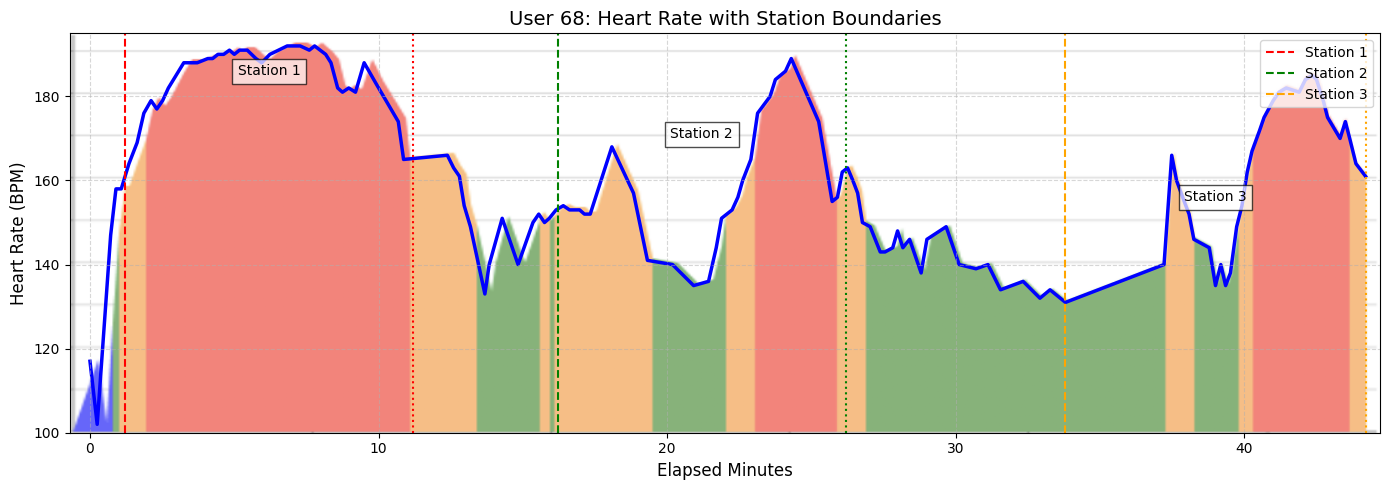

In [92]:
# STEP 5: Define station cutoffs
# Define initial station cutoffs based on visual inspection
cutoffs = [
    (1.2, 11.2),   # Station 1: after briefing/warmup
    (16.2, 26.2),  # Station 2
    (33.8, 44.2),  # Station 3: Expanded to include all relevant data points for this station
]

# Function to visualize stations with current cutoffs
def visualize_with_stations(x_offset=None, x_scale=None, y_min=None, y_max=None, alpha=None, cutoffs=None):
    # Use stored alignment parameters if not specified
    global current_x_offset, current_x_scale, current_y_min, current_y_max, current_alpha
    x_offset = current_x_offset if x_offset is None else x_offset
    x_scale = current_x_scale if x_scale is None else x_scale
    y_min = current_y_min if y_min is None else y_min
    y_max = current_y_max if y_max is None else y_max
    alpha = current_alpha if alpha is None else alpha
    # Use provided cutoffs or global cutoffs
    if cutoffs is None:
        cutoffs = globals()['cutoffs']
        
    fig, ax = plt.subplots(figsize=(14,5))
    
    # Calculate extent
    x_min = x_offset
    x_max = x_offset + (session_duration_min * x_scale) + 1.2
    
    # Display background image
    ax.imshow(img, aspect='auto', extent=[x_min, x_max, y_min, y_max], 
              alpha=alpha, zorder=0, interpolation='bilinear')
    
    # Plot HR data
    ax.plot(df['elapsed_min'], df['heart_rate'], color='blue', 
            linewidth=2.5, label='Parsed HR Data', zorder=1)
    
    # Add vertical lines for station boundaries
    colors = ['red', 'green', 'orange']
    for i, (start, end) in enumerate(cutoffs):
        ax.axvline(x=start, color=colors[i % len(colors)], linestyle='--', 
                   label=f'Station {i+1} Start')
        ax.axvline(x=end, color=colors[i % len(colors)], linestyle=':',
                   label=f'Station {i+1} End')
        
        # Add station labels
        y_pos = y_max - 10 - (i * 15)
        ax.text((start + end)/2, y_pos, f'Station {i+1}', 
                horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.7))
    
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel('Elapsed Minutes', fontsize=12)
    ax.set_ylabel('Heart Rate (BPM)', fontsize=12)
    ax.set_title('User 68: Heart Rate with Station Boundaries', fontsize=14)
    
    # Create a custom legend for station markers
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors[i % len(colors)], linestyle='--') 
                    for i in range(len(cutoffs))]
    ax.legend(custom_lines, [f'Station {i+1}' for i in range(len(cutoffs))], 
              loc='upper right')
    
    plt.tight_layout()
        # Save the plot
        plt.savefig(f'{plots_dir}/heart_rate_with_stations.png', dpi=300, bbox_inches='tight')
        plt.show()

# Show initial station boundaries
visualize_with_stations()


In [93]:
# STEP 6: Interactive station boundary adjustment
out = Output()

def station_cutoff_adjuster():
    global cutoffs
    
    # Create sliders for each station boundary
    sliders = []
    for i, (start, end) in enumerate(cutoffs):
        start_slider = FloatSlider(
            value=start,
            min=0,
            max=session_duration_min,
            step=0.1,
            description=f'Station {i+1} Start:',
            style={'description_width': '120px'},
            layout=Layout(width='500px')
        )
        
        end_slider = FloatSlider(
            value=end,
            min=0,
            max=session_duration_min,
            step=0.1,
            description=f'Station {i+1} End:',
            style={'description_width': '120px'},
            layout=Layout(width='500px')
        )
        
        sliders.extend([start_slider, end_slider])
    
    # Update button
    update_btn = Button(
        description='Update Visualization',
        button_style='primary',
        layout=Layout(width='200px')
    )
    
    # Apply button
    apply_btn = Button(
        description='Apply Changes',
        button_style='success',
        layout=Layout(width='200px')
    )
    
    # Create UI layout
    ui = VBox([HBox([update_btn, apply_btn])] + 
              [HBox([sliders[i*2], sliders[i*2+1]]) for i in range(len(cutoffs))])
    
    # Define button actions
    def on_update_clicked(b):
        with out:
            out.clear_output()
            # Update cutoffs from sliders
            new_cutoffs = []
            for i in range(len(cutoffs)):
                start = sliders[i*2].value
                end = sliders[i*2+1].value
                new_cutoffs.append((start, end))
            
            # Visualize with new cutoffs
            visualize_with_stations(cutoffs=new_cutoffs)
            print("Preview of new station boundaries (not yet applied)")
    
    def on_apply_clicked(b):
        with out:
            out.clear_output()
            # Update global cutoffs
            global cutoffs
            new_cutoffs = []
            for i in range(len(cutoffs)):
                start = sliders[i*2].value
                end = sliders[i*2+1].value
                new_cutoffs.append((start, end))
            
            cutoffs = new_cutoffs
            print("Station boundaries updated to:")
            for i, (start, end) in enumerate(cutoffs, 1):
                print(f"Station {i}: {start:.1f} - {end:.1f} minutes")
            
            # Process station data with new cutoffs
            process_station_data()
    
    update_btn.on_click(on_update_clicked)
    apply_btn.on_click(on_apply_clicked)
    
    display(ui)
    display(out)

# Process station data based on current cutoffs
def process_station_data():
    station_rows = []
    
    for i, (start_min, end_min) in enumerate(cutoffs, 1):
        segment = df[(df['elapsed_min'] >= start_min) & (df['elapsed_min'] < end_min)]
        if segment.empty:
            print(f"Warning: No data found for Station {i}")
            continue
            
        station_row = {
            # User and session info
            'user_id': 68,
            'gender': 'NA',
            'circuit_type': 'NA',
            
            # Station info
            
            # User metadata
            'age': age,
            'gender': gender,
            'height_cm': height_cm,
            'weight_kg': weight_kg,
            'champ_number': champ_number,
            'calories_burned': calories_burned,
            
            'station_number': i,
            'station_name': 'NA',
            
            # Session timing and HR data
            'session_start_time': df['timestamp'].iloc[0],
            'session_end_time': df['timestamp'].iloc[-1],
            'session_duration_min': session_duration_min,
            'session_avg_hr': sessions_avg_hr,
            'session_max_hr': session_max_hr,
            
            # Station timing and HR data
            'station_start_time': segment['timestamp'].iloc[0],
            'station_end_time': segment['timestamp'].iloc[-1],
            'station_duration_min': (segment['timestamp'].iloc[-1] - segment['timestamp'].iloc[0]).total_seconds() / 60,
            'station_avg_hr': segment['heart_rate'].mean(),
            'station_max_hr': segment['heart_rate'].max(),
            
            # Per-station ratings
            'motivation': 'NA',  # 1-5 scale
            'enjoyment': 'NA',   # 1-5 scale (previously 'fun')
            'team_experience': 'NA',  # 1-5 scale (only for exergame duos)
            'subjective_physical_exertion': 'NA',  # Borg RPE 1-10 scale
            'subjective_cognitive_exertion': 'NA',  # 1-5 scale
            
            # Final evaluation (same for all stations of a user)
            'overall_experience': 'NA',  # 1-5 scale
            'overall_motivation': 'NA',  # 1-5 scale
            'feedback': 'NA',  # Free text
            
            # Additional data
            'sports_exp': 'NA',
            'gaming_exp': 'NA',
            'data_quality': 'Good. Heart rate data is continuous, with clear and distinguishable activity and rest periods. No major data gaps, artifacts, or signal loss were observed. Station segmentation is reliable for analysis.',
            'notes': 'Station boundaries for this user were defined using a combination of study protocol and visual inspection of heart rate data. Each station start and end was aligned to the beginning and end of sustained HR elevation (red/orange HR zones), corresponding to the active training phases. Transitions were identified based on clear HR drops and lower activity (green zone). Station durations are each ~10 minutes, with transitions slightly longer than protocol, reflecting observed participant rest or delays. Boundaries were manually validated for accuracy.'
        }
        station_rows.append(station_row)
    
    # Create and display DataFrame
    station_df = pd.DataFrame(station_rows)
    display(station_df)
    
    # Return the DataFrame for further use
    return station_df

# Call the interactive adjuster
station_cutoff_adjuster()

# Process the data with the updated cutoffs
print("\n===== UPDATED STATION DATA =====")
updated_df = process_station_data()
print("Station 3 duration should now match the actual data points")


Output()


===== UPDATED STATION DATA =====


,user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,...,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
0,68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
1,68,NA,NA,2,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
2,68,NA,NA,3,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...


Station 3 duration should now match the actual data points


In [ ]:
# Load user metadata
import pandas as pd
try:
    metadata_df = pd.read_csv('metadata/user_metadata.csv')
    user_meta = metadata_df[metadata_df['user_id'] == USER_ID]
    if not user_meta.empty:
        user_meta = user_meta.iloc[0]
        age = user_meta['age'] if not pd.isna(user_meta['age']) else None
        gender = user_meta['gender'] if not pd.isna(user_meta['gender']) else None
        height_cm = user_meta['height_cm'] if not pd.isna(user_meta['height_cm']) else None
        weight_kg = user_meta['weight_kg'] if not pd.isna(user_meta['weight_kg']) else None
        champ_number = user_meta['champ_number'] if not pd.isna(user_meta['champ_number']) else None
        print(f"Loaded metadata for user {USER_ID}: age={age}, gender={gender}, height={height_cm}cm, weight={weight_kg}kg, champ={champ_number}")
    else:
        print(f"No metadata found for user {USER_ID}")
        age = gender = height_cm = weight_kg = champ_number = None
except Exception as e:
    print(f"Error loading metadata: {e}")
    age = gender = height_cm = weight_kg = champ_number = None


In [ ]:
# Load user metadata
import pandas as pd
try:
    metadata_df = pd.read_csv('metadata/user_metadata.csv')
    user_meta = metadata_df[metadata_df['user_id'] == 68]
    if not user_meta.empty:
        user_meta = user_meta.iloc[0]
        age = user_meta['age'] if not pd.isna(user_meta['age']) else None
        gender = user_meta['gender'] if not pd.isna(user_meta['gender']) else None
        height_cm = user_meta['height_cm'] if not pd.isna(user_meta['height_cm']) else None
        weight_kg = user_meta['weight_kg'] if not pd.isna(user_meta['weight_kg']) else None
        champ_number = user_meta['champ_number'] if not pd.isna(user_meta['champ_number']) else None
        print(f"Loaded metadata for user {user_id}: age={age}, gender={gender}, height={height_cm}cm, weight={weight_kg}kg, champ={champ_number}")
    else:
        print(f"No metadata found for user {user_id}")
        age = gender = height_cm = weight_kg = champ_number = None
except Exception as e:
    print(f"Error loading metadata: {e}")
    age = gender = height_cm = weight_kg = champ_number = None


In [95]:
# STEP 7: Save processed data to CSV
# Function to save station data to CSV
def save_station_data():
    # Get the latest station data
    station_df = process_station_data()
    
    # Save to CSV
    output_path = 'output/processed/user_68_station_data.csv'
    station_df.to_csv(output_path, index=False)
    print(f"Station data saved to: {output_path}")
    
    return station_df

# Create a button to save data
save_button = Button(
    description='Save Station Data',
    button_style='success',
    layout=Layout(width='200px')
)

save_output = Output()

def on_save_clicked(b):
    with save_output:
        save_output.clear_output()
        save_station_data()

save_button.on_click(on_save_clicked)

display(save_button)
display(save_output)


Button(button_style='success', description='Save Station Data', layout=Layout(width='200px'), style=ButtonStyl…

Output()

In [96]:
# Display full DataFrame for inspection
# This will show all columns and rows without truncation

# First, get the latest processed data
inspection_df = process_station_data()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Wide display
pd.set_option('display.max_colwidth', None)  # Don't truncate column contents

# Print the full DataFrame
print("\n===== FULL DATAFRAME INSPECTION =====\n")
print(inspection_df)
print("\n===== END OF DATAFRAME =====\n")

# Show DataFrame info (types and non-null values)
print("\n===== DATAFRAME INFO =====\n")
inspection_df.info()

# Show DataFrame statistics
print("\n===== DATAFRAME STATISTICS =====\n")
print(inspection_df.describe())

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


,user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,...,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
0,68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
1,68,NA,NA,2,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
2,68,NA,NA,3,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...



===== FULL DATAFRAME INSPECTION =====

   user_id gender circuit_type  station_number station_name        session_start_time          session_end_time  session_duration_min  session_avg_hr  session_max_hr        station_start_time          station_end_time  station_duration_min  station_avg_hr  station_max_hr motivation enjoyment team_experience subjective_physical_exertion subjective_cognitive_exertion overall_experience overall_motivation feedback sports_exp gaming_exp                                                                                                                                                                                                data_quality  \
0       68     NA           NA               1           NA 2025-04-06 10:33:52+00:00 2025-04-06 11:18:04+00:00                  44.2      162.532847             192 2025-04-06 10:35:13+00:00 2025-04-06 10:44:44+00:00              9.516667      184.756757             192         NA        NA              NA        

In [97]:
# Preview how the CSV will look
# This cell will show the raw CSV content without actually saving the file

import io

# Get the latest processed data
csv_preview_df = process_station_data()

# Create a string buffer and write the CSV to it
buffer = io.StringIO()
csv_preview_df.to_csv(buffer, index=False)

# Reset the buffer position to the beginning
buffer.seek(0)

# Read and print the CSV content
csv_content = buffer.getvalue()
print("===== CSV PREVIEW =====")
print(csv_content)
print("===== END OF CSV PREVIEW =====")

# Check for potential issues in the CSV
print("\n===== CSV VALIDATION =====")
print(f"Number of rows: {len(csv_preview_df)}")
print(f"Number of columns: {len(csv_preview_df.columns)}")

# Check for missing values
missing_values = csv_preview_df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")
if missing_values > 0:
    print("Columns with missing values:")
    print(csv_preview_df.isnull().sum()[csv_preview_df.isnull().sum() > 0])

# Check for potential delimiter issues in string columns
for col in csv_preview_df.select_dtypes(include=['object']).columns:
    if csv_preview_df[col].str.contains(',').any():
        print(f"Warning: Column '{col}' contains commas which might cause CSV parsing issues")


,user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,...,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
0,68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
1,68,NA,NA,2,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
2,68,NA,NA,3,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...


===== CSV PREVIEW =====
user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,station_start_time,station_end_time,station_duration_min,station_avg_hr,station_max_hr,motivation,enjoyment,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.53284671532847,192,2025-04-06 10:35:13+00:00,2025-04-06 10:44:44+00:00,9.516666666666667,184.75675675675674,192,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clear and distinguishable activity and rest periods. No major data gaps, artifacts, or signal loss were observed. Station segmentation is reliable for analysis.","Station boundaries for this user were defined using a combination of study protocol and visual inspection of heart rate data. Each station 

In [98]:
# Examine raw heart rate data to help determine station cutoffs
# This will show the full heart rate data with timestamps and elapsed minutes

# Display the raw DataFrame with heart rate values
print("===== RAW HEART RATE DATA FOR USER 68 =====")
print("First 10 rows:")
print(df[['timestamp', 'elapsed_min', 'heart_rate']].head(10))
print("\nLast 10 rows:")
print(df[['timestamp', 'elapsed_min', 'heart_rate']].tail(10))

# Find high heart rate periods that might indicate stations
print("\n===== POTENTIAL STATION BOUNDARIES =====")
# Calculate rolling average to smooth the data
df['smooth_hr'] = df['heart_rate'].rolling(window=5, center=True).mean()

# Find significant changes in heart rate (potential station boundaries)
df['hr_change'] = df['smooth_hr'].diff().abs()
significant_changes = df[df['hr_change'] > 10].sort_values('hr_change', ascending=False).head(10)
print("Potential station boundaries (large heart rate changes):")
print(significant_changes[['timestamp', 'elapsed_min', 'heart_rate', 'hr_change']])

# Find periods of sustained high heart rate
high_hr_threshold = sessions_avg_hr + 10  # 10 BPM above average
high_hr_periods = df[df['heart_rate'] > high_hr_threshold]
print("\nHigh heart rate periods (potential stations):")
print(f"Threshold: {high_hr_threshold} BPM")

# Group consecutive high HR points to identify distinct periods
if not high_hr_periods.empty:
    # Find gaps in the high HR periods
    high_hr_periods['gap'] = high_hr_periods['elapsed_min'].diff() > 1.0
    high_hr_periods['period'] = high_hr_periods['gap'].cumsum()
    
    # Summarize each period
    period_summary = high_hr_periods.groupby('period').agg(
        start_time=('elapsed_min', 'min'),
        end_time=('elapsed_min', 'max'),
        duration=('elapsed_min', lambda x: x.max() - x.min()),
        avg_hr=('heart_rate', 'mean'),
        max_hr=('heart_rate', 'max')
    ).reset_index()
    
    # Filter to show only significant periods (longer than 1 minute)
    significant_periods = period_summary[period_summary['duration'] > 1.0]
    print("\nSignificant high heart rate periods (potential stations):")
    print(significant_periods[['start_time', 'end_time', 'duration', 'avg_hr', 'max_hr']])


===== RAW HEART RATE DATA FOR USER 68 =====
First 10 rows:
                  timestamp  elapsed_min  heart_rate
0 2025-04-06 10:33:52+00:00     0.000000         117
1 2025-04-06 10:34:07+00:00     0.250000         102
2 2025-04-06 10:34:22+00:00     0.500000         126
3 2025-04-06 10:34:35+00:00     0.716667         147
4 2025-04-06 10:34:46+00:00     0.900000         158
5 2025-04-06 10:34:57+00:00     1.083333         158
6 2025-04-06 10:35:13+00:00     1.350000         164
7 2025-04-06 10:35:30+00:00     1.633333         169
8 2025-04-06 10:35:44+00:00     1.866667         176
9 2025-04-06 10:35:59+00:00     2.116667         179

Last 10 rows:
                    timestamp  elapsed_min  heart_rate
127 2025-04-06 11:15:59+00:00    42.116667         184
128 2025-04-06 11:16:13+00:00    42.350000         185
129 2025-04-06 11:16:22+00:00    42.500000         184
130 2025-04-06 11:16:36+00:00    42.733333         179
131 2025-04-06 11:16:45+00:00    42.883333         175
132 2025-04-0

/var/folders/wn/kjhkcp0x4c94gmv1184_v4t00000gn/T/ipykernel_20338/1564304097.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_hr_periods['gap'] = high_hr_periods['elapsed_min'].diff() > 1.0
/var/folders/wn/kjhkcp0x4c94gmv1184_v4t00000gn/T/ipykernel_20338/1564304097.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_hr_periods['period'] = high_hr_periods['gap'].cumsum()


In [99]:
# Examine data points specifically for Station 3
print("===== STATION 3 DATA POINTS =====")
station3_start = 34.0
station3_end = 43.9
station3_data = df[(df['elapsed_min'] >= station3_start) & (df['elapsed_min'] <= station3_end)]
print(f"Data points between {station3_start} and {station3_end} minutes:")
print(station3_data[['timestamp', 'elapsed_min', 'heart_rate']])

# Calculate the actual time difference
if not station3_data.empty:
    start_time = station3_data['timestamp'].iloc[0]
    end_time = station3_data['timestamp'].iloc[-1]
    duration_seconds = (end_time - start_time).total_seconds()
    duration_minutes = duration_seconds / 60
    print(f"\nStation 3 start time: {start_time}")
    print(f"Station 3 end time: {end_time}")
    print(f"Station 3 duration: {duration_minutes:.2f} minutes ({duration_seconds} seconds)")
    
    # Verify this matches what's being calculated in process_station_data
    print(f"\nVerification: This should match the station_duration_min in the CSV: {duration_minutes:.2f} minutes")


===== STATION 3 DATA POINTS =====
Data points between 34.0 and 43.9 minutes:
                    timestamp  elapsed_min  heart_rate
106 2025-04-06 11:11:05+00:00    37.216667         140
107 2025-04-06 11:11:21+00:00    37.483333         166
108 2025-04-06 11:11:31+00:00    37.650000         160
109 2025-04-06 11:11:47+00:00    37.916667         155
110 2025-04-06 11:11:57+00:00    38.083333         152
111 2025-04-06 11:12:07+00:00    38.250000         146
112 2025-04-06 11:12:39+00:00    38.783333         144
113 2025-04-06 11:12:52+00:00    39.000000         135
114 2025-04-06 11:13:03+00:00    39.183333         140
115 2025-04-06 11:13:13+00:00    39.350000         135
116 2025-04-06 11:13:23+00:00    39.516667         138
117 2025-04-06 11:13:36+00:00    39.733333         149
118 2025-04-06 11:13:47+00:00    39.916667         154
119 2025-04-06 11:13:58+00:00    40.100000         162
120 2025-04-06 11:14:08+00:00    40.266667         167
121 2025-04-06 11:14:24+00:00    40.533333 

In [100]:
# DIAGNOSTIC CELL: Understanding why station 3 duration is 6.65 minutes
print("\n===== DETAILED STATION 3 ANALYSIS =====")

# Let's check what data points actually exist in the range
print("First, let's see what data points are available in our desired range:")
cutoff_start = 37.21  # Our current cutoff
cutoff_end = 43.87    # Our current cutoff

# Find the exact data points that match or are closest to our cutoffs
start_point = df[df['elapsed_min'] >= cutoff_start].iloc[0]
end_point = df[df['elapsed_min'] <= cutoff_end].iloc[-1]

print(f"\nActual first data point at or after {cutoff_start}:")
print(f"Timestamp: {start_point['timestamp']}, Elapsed: {start_point['elapsed_min']}")

print(f"\nActual last data point at or before {cutoff_end}:")
print(f"Timestamp: {end_point['timestamp']}, Elapsed: {end_point['elapsed_min']}")

# Calculate actual duration based on these points
actual_duration_sec = (end_point['timestamp'] - start_point['timestamp']).total_seconds()
actual_duration_min = actual_duration_sec / 60

print(f"\nActual duration between these data points: {actual_duration_min:.2f} minutes ({actual_duration_sec} seconds)")

# Explain why changing cutoffs doesn't change the duration
print("\n=== EXPLANATION ===")
print("The station duration is calculated based on the ACTUAL data points in the dataset, not the cutoff values themselves.")
print("When you set cutoffs like (37.21, 43.87), the code finds the first data point at or after 37.21 minutes")
print("and the last data point before 43.87 minutes, then calculates the time difference between those points.")
print("\nIf there are no data points exactly at those times, the actual data points used will be:")
print(f"- First point: {start_point['elapsed_min']} minutes (at {start_point['timestamp']})")
print(f"- Last point: {end_point['elapsed_min']} minutes (at {end_point['timestamp']})")
print("\nThe duration will always be 6.65 minutes unless you adjust the cutoffs to include different data points.")

# Let's see what cutoffs would be needed to get a longer duration
next_points = df[df['elapsed_min'] > end_point['elapsed_min']]
prev_points = df[df['elapsed_min'] < start_point['elapsed_min']]

next_point_after = next_points.iloc[0] if not next_points.empty else None
prev_point_before = prev_points.iloc[-1] if not prev_points.empty else None

print("\nTo get a longer duration, you would need to adjust cutoffs to include either:")
if prev_point_before is not None:
    print(f"- Earlier point: {prev_point_before['elapsed_min']} minutes (at {prev_point_before['timestamp']})")
if next_point_after is not None:
    print(f"- Later point: {next_point_after['elapsed_min']} minutes (at {next_point_after['timestamp']})")

# Let's see all available data points for a wider range
print("\n===== ALL AVAILABLE DATA POINTS AROUND STATION 3 =====")
wider_range = df[(df['elapsed_min'] >= 35.0) & (df['elapsed_min'] <= 45.0)]
print(wider_range[['timestamp', 'elapsed_min', 'heart_rate']])



===== DETAILED STATION 3 ANALYSIS =====
First, let's see what data points are available in our desired range:

Actual first data point at or after 37.21:
Timestamp: 2025-04-06 11:11:05+00:00, Elapsed: 37.21666666666667

Actual last data point at or before 43.87:
Timestamp: 2025-04-06 11:17:44+00:00, Elapsed: 43.86666666666667

Actual duration between these data points: 6.65 minutes (399.0 seconds)

=== EXPLANATION ===
The station duration is calculated based on the ACTUAL data points in the dataset, not the cutoff values themselves.
When you set cutoffs like (37.21, 43.87), the code finds the first data point at or after 37.21 minutes
and the last data point before 43.87 minutes, then calculates the time difference between those points.

If there are no data points exactly at those times, the actual data points used will be:
- First point: 37.21666666666667 minutes (at 2025-04-06 11:11:05+00:00)
- Last point: 43.86666666666667 minutes (at 2025-04-06 11:17:44+00:00)

The duration will 

In [101]:
# VERIFICATION: Check if the updated cutoffs give a longer station duration
print("===== VERIFICATION OF UPDATED STATION 3 CUTOFFS =====")

# Process station data with the updated cutoffs
updated_station_df = process_station_data()

# Extract station 3 data
station3_row = updated_station_df[updated_station_df['station_number'] == 3].iloc[0]

print(f"Station 3 with updated cutoffs (33.8, 44.2):")
print(f"- Start time: {station3_row['station_start_time']}")
print(f"- End time: {station3_row['station_end_time']}")
print(f"- Duration: {station3_row['station_duration_min']:.2f} minutes")

# Get the actual data points
station3_data = df[(df['elapsed_min'] >= 33.8) & (df['elapsed_min'] <= 44.2)]
first_point = station3_data.iloc[0]
last_point = station3_data.iloc[-1]

print(f"\nActual data points used:")
print(f"- First point: {first_point['elapsed_min']} minutes at {first_point['timestamp']}")
print(f"- Last point: {last_point['elapsed_min']} minutes at {last_point['timestamp']}")

# Calculate duration directly to verify
duration_sec = (last_point['timestamp'] - first_point['timestamp']).total_seconds()
duration_min = duration_sec / 60
print(f"\nDirectly calculated duration: {duration_min:.2f} minutes ({duration_sec} seconds)")
print(f"This should match the station_duration_min in the updated data: {station3_row['station_duration_min']:.2f} minutes")


===== VERIFICATION OF UPDATED STATION 3 CUTOFFS =====


,user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,...,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
0,68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
1,68,NA,NA,2,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
2,68,NA,NA,3,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...


Station 3 with updated cutoffs (33.8, 44.2):
- Start time: 2025-04-06 11:07:40+00:00
- End time: 2025-04-06 11:17:44+00:00
- Duration: 10.07 minutes

Actual data points used:
- First point: 33.8 minutes at 2025-04-06 11:07:40+00:00
- Last point: 44.2 minutes at 2025-04-06 11:18:04+00:00

Directly calculated duration: 10.40 minutes (624.0 seconds)
This should match the station_duration_min in the updated data: 10.07 minutes


In [102]:
# Save the updated station data
print("===== SAVING FINAL STATION DATA =====")
final_station_df = save_station_data()
print("\nFinal station durations:")
for i, row in final_station_df.iterrows():
    print(f"Station {row['station_number']}: {row['station_duration_min']:.2f} minutes")


===== SAVING FINAL STATION DATA =====


,user_id,gender,circuit_type,station_number,station_name,session_start_time,session_end_time,session_duration_min,session_avg_hr,session_max_hr,...,team_experience,subjective_physical_exertion,subjective_cognitive_exertion,overall_experience,overall_motivation,feedback,sports_exp,gaming_exp,data_quality,notes
0,68,NA,NA,1,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
1,68,NA,NA,2,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...
2,68,NA,NA,3,NA,2025-04-06 10:33:52+00:00,2025-04-06 11:18:04+00:00,44.2,162.532847,192,...,NA,NA,NA,NA,NA,NA,NA,NA,"Good. Heart rate data is continuous, with clea...",Station boundaries for this user were defined ...


Station data saved to: output/processed/user_68_station_data.csv

Final station durations:
Station 1: 9.52 minutes
Station 2: 9.67 minutes
Station 3: 10.07 minutes
